# **Qiskit Fall Fest Ghana: Challenge Day** 💥

### **Challenge Rules** 

**5 Problem Sets**

1. Sumbmission deadline **1 hour** after starting
2. Submit your completed jupyter notebook here: [Challenge Submission Form](https://forms.gle/XRd5iNS7MH2MjN8H6)
3. You should sign-in to your email before submission would work
4. Work independently, no team work.
5. Your code should match the output
6. How to use the Development environments to execute the task is also part of the challenge

#### **1st Problem: Create and Draw the Circuit**
---
Independently, create and draw a 5-qubit/5-classical bit quantum circuit where you apply the gates listed below, using a loop for the CXs, and measure.

-----------------------------------------
H on qubit 0

CX with qubit 0 as the control and qubit 1 as the target

CX with qubit 1 as the control and qubit 2 as the target

CX with qubit 2 as the control and qubit 3 as the target

CX with qubit 3 as the control and qubit 4 as the target

<br>

----------------------------------------------------
**NOTE: Be careful of going over the number of qubits in the loop.**

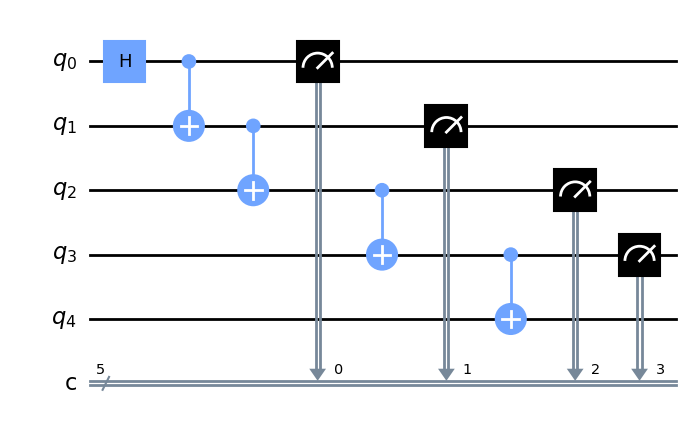

In [10]:
# YOUR CODE HERE
from qiskit import QuantumCircuit

qc = QuantumCircuit(5, 5)

qc.h(0)


for i in range(4):
    qc.cx(i, i+1)

for j in range(4):
    qc.measure(j, j)

qc.draw('mpl')

#### **2nd Problem: Read and Apply**
---

There are more advanced gates than the ones we could introduce throughout this week.

Now the purpose of this part of the challenge is to test your ability to **read documentation** and apply that knowledge to construct circuits on your own.

Here's your task

1. Read about the multi-controlled CNOT (`MCXGate`) [Read Here](https://qiskit.org/documentation/apidoc/circuit_library.html)
2. Use that knowledge to construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1HP8EBaXgIFBRY1-FIWDn43ILkiw6MvbH/view?usp=sharing)

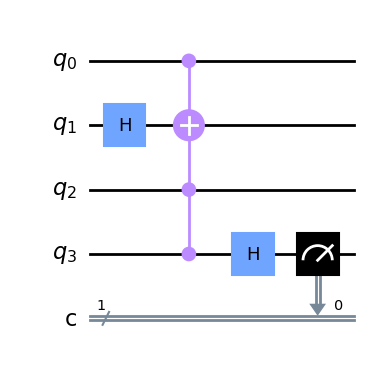

In [17]:
# YOUR CODE HERE
from qiskit.circuit.library import MCXGate

gate = MCXGate(3)

qc = QuantumCircuit(4, 1)
qc.h(1)
qc.append(gate, [0, 2, 3, 1])
qc.h(3)
qc.measure(3, 0)

qc.draw('mpl')

#### **3rd Problem: Surprise Circuit**
---

Construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1l_xdfMEMQaroihLT_CfINL_K0q_sVZOf/view?usp=sharing)

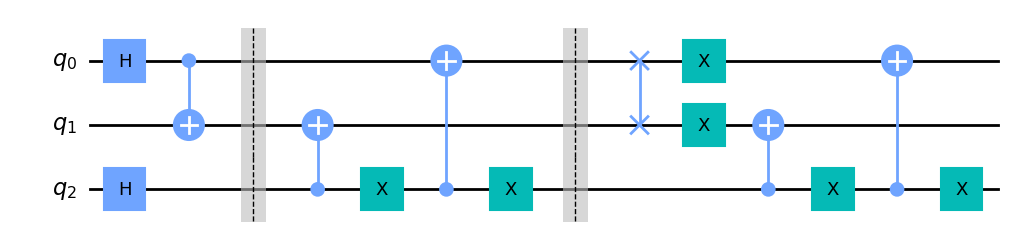

In [18]:
# YOUR CODE HERE
qc = QuantumCircuit(3)

# Applying the gates
qc.h(0)
qc.h(2)
qc.cx(0, 1)

qc.barrier(0, 1, 2)

qc.cx(2, 1)
qc.x(2)
qc.cx(2, 0)
qc.x(2)

qc.barrier(0, 1, 2)

qc.swap(0, 1)
qc.x(1)
qc.cx(2, 1)
qc.x(0)
qc.x(2)
qc.cx(2, 0)
qc.x(2)


qc.draw(output="mpl")

#### **4th Problem: Have Fun!**
---

Construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1DX85EjSMJP4g04ZcROwOECGRsw2kXNDU/view?usp=sharing)

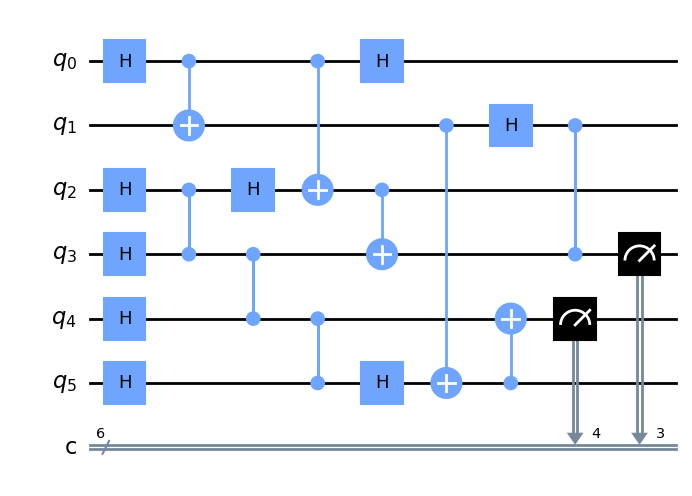

In [36]:
# YOUR CODE HERE
qc = QuantumCircuit(6, 6)

for i in range(6):
    if i != 1:
        qc.h(i)

for j in range(4):
    if j == 0:
        qc.cx(0, 1)
        
    else:
        qc.cz(j+1, j+2)
        
qc.h(2)
qc.cx(0, 2)
qc.h([0, 5])    
qc.cx(1, 5)
qc.h(1)

qc.cx(2, 3)
qc.cx(5, 4)

qc.cz(1, 3)

#measure
qc.measure(3, 3)
qc.measure(4, 4)

qc.draw('mpl')

#### **5th Problem: Have Fun!**
---

Construct the Quantum Circuit drawn here: [Click to View Circuit](https://drive.google.com/file/d/1XkypxqXSVbhcT5tnI9Bygdx3jrbdCnNb/view?usp=sharing)

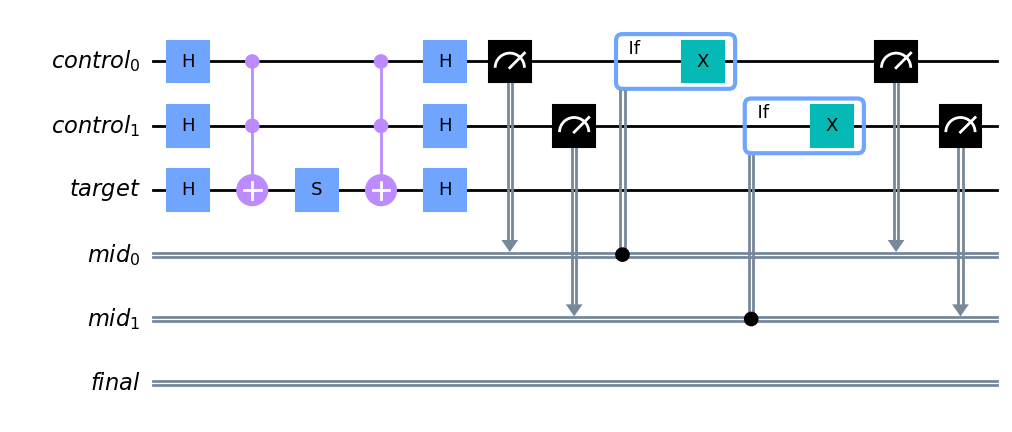

In [20]:
from qiskit import *

# Defining the required registers
controls = QuantumRegister(2, name="control")
target = QuantumRegister(1, name="target")

mid_measure = ClassicalRegister(2, name="mid")
final_measure = ClassicalRegister(1, name="final")

base = QuantumCircuit(controls, target, mid_measure, final_measure)

#Let's define the circuit in a function and return it
def quantumcircuit(
    circuit: QuantumCircuit,
    target: QuantumRegister,
    controls: QuantumRegister,
    measures: ClassicalRegister,
    ):

    circuit.h(controls)
    circuit.h(target)
    circuit.ccx(*controls, target)
    circuit.s(target)
    circuit.ccx(*controls, target)
    circuit.h(controls)
    circuit.h(target)
    circuit.measure(controls, measures)

    return circuit


# Lets define another function to reset the qubits after taking the measurements
def reset_controls(
    circuit: QuantumCircuit, controls: QuantumRegister, measures: ClassicalRegister
):
    #Reset the control qubits if they are in |1>.
    with circuit.if_test((measures[0], 1)):
        circuit.x(controls[0])
    with circuit.if_test((measures[1], 1)):
        circuit.x(controls[1])


qc = base.copy_empty_like()
quantumcircuit(qc, target, controls, mid_measure)
reset_controls(qc, controls, mid_measure)
qc.measure(controls, mid_measure)
qc.draw("mpl", cregbundle=False)

---
#### 2023 Qiskit Fall Fest - Ghana: Quantum Computing For Social Good 